# Descriptive Statistics Review

In this second part of the lab, we are going to continue working with the data that we cleaned in the last part. 
Be sure to continue to write clean code and comment your work well!

First, lets import our libraries and the data we saved. 

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
diamonds = pd.read_csv('diamonds_clean.csv')
diamonds = diamonds.drop('Unnamed: 0', axis=1)

Now that we cleaned our data, we can proceed with some exploratory analysis. We will analyze the features that affect price the most.

Let's start by looking at how the charateristics of a diamond (especially the price, since that's our focus) change based on its color. Remember that you can use the `groupby()` method in pandas. 

**Using the `describe()` method, take a look on the dataset paying special attention to the variability. Comment what you see.**

In [3]:
diamonds.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,40086.000000,0.0,37368.000000,35258.000000,39301.000000,38230.000000,40455.000000,40348.000000,40421.000000,40430.000000
mean,0.575295,NaN,2.517502,2.044869,61.167525,56.328085,2013.048844,5.230362,5.238696,3.233823
std,0.250164,NaN,1.225357,0.830964,1.096023,1.297305,1421.415465,0.760713,0.757544,0.472419
min,0.200000,NaN,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,1.070000
25%,0.340000,NaN,2.000000,1.000000,60.700000,55.000000,810.000000,4.500000,4.510000,2.780000
50%,0.510000,NaN,3.000000,2.000000,61.500000,56.000000,1572.000000,5.160000,5.170000,3.190000
75%,0.750000,NaN,4.000000,3.000000,62.000000,57.000000,3001.000000,5.860000,5.870000,3.620000
max,1.030000,NaN,4.000000,3.000000,62.400000,58.900000,5324.000000,6.530000,6.530000,4.030000


In [4]:
#price varies quite considerably, from 326 to 5324.

Let's proceed to check each feature separately. 

**Before starting, which features do you think that will affect the price most and why? You will contrast your hypotheses with your results.**

In [5]:
#catarat and clarity?

## 1. The `color` column
First, let's look at the color column.

**For each different color, find the mean of each column. You should have a matrix with every color as rows and the columns `carat`, `clarity`, etc as columns.**

In [6]:
diamonds.pivot_table(index = "color", values =["carat", "clarity","price"], aggfunc = "mean")

,carat,clarity,price
color,,,
0.0,0.647715,2.075622,2481.349225
1.0,0.594605,2.020295,2225.406967
2.0,0.591828,1.956761,2237.179789
3.0,0.565666,2.082877,1851.291142
4.0,0.592197,2.050296,2031.362853


**What do you see? Pay special attention to the relationship between price and color.**

In [7]:
#color 3 is cheaper, color 0 is the more expensive

Let's go further into the color feature. We will plot the frequency distribution of the diamonds color in our dataset. 

**Plot the distribution and analyze it. Remember that you can use the pandas `plot()` method.**

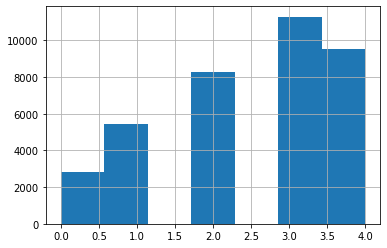

In [16]:
diamonds.color.hist(bins = 7)

In [ ]:
# The plot shows that color three is the most expensive color, which is different from the above impression?

In [36]:
diamonds.color.corr(diamonds.price)

-0.09416718042395215

## 2.The `carat` column 

Let's check the `carat` (weight), since this could also be a potential factor for price change.

**Find the mean of each column for each value of `carat` using the `groupby` method. Then comment your results.**

In [17]:
diamonds.groupby("carat").agg("mean")

,cut,color,clarity,depth,table,price,x,y,z
carat,,,,,,,,,
0.20,NaN,4.000000,2.833333,60.720000,56.333333,365.166667,3.786667,3.753333,2.303333
0.21,NaN,NaN,2.666667,60.175000,55.333333,380.222222,3.874444,3.837778,2.332222
0.22,NaN,4.000000,2.600000,60.750000,58.000000,391.400000,3.898000,3.848000,2.386000
0.23,NaN,3.462810,2.815789,60.895536,56.483333,486.143345,3.946382,3.973379,2.431468
0.24,NaN,3.345070,2.828571,61.134184,56.564516,505.185039,3.990157,4.019331,2.465591
0.25,NaN,3.258621,2.580645,61.031847,56.069444,550.924528,4.062500,4.086934,2.506934
0.26,NaN,3.026846,2.609756,61.277202,56.088945,550.897233,4.102688,4.124704,2.536364
0.27,NaN,2.864407,2.825000,61.337879,56.172680,574.759657,4.159142,4.181588,2.567897
0.28,NaN,2.982759,2.764706,61.210843,55.846667,580.121212,4.207172,4.233687,2.595707


In [ ]:
# the more carats, the higher the price of the diamond. There's a high
# correlation between number of carats and the price.

In [35]:
diamonds.carat.corr(diamonds.price)

0.9398235790494515


**Plot a histogram of the `carat` column by using the `plot` method (see the docs to find an easy way to do so). What is happening?**

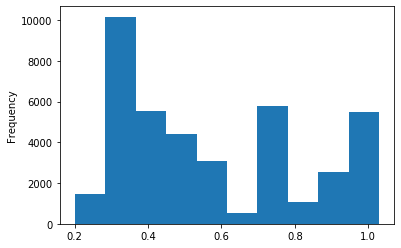

In [23]:
diamonds.carat.plot.hist(y="price")

# 3. The `table` and `clarity` column
Finally, let's check the `table`.

**Find the mean of each column for each value of `table` using the `groupby` method. Then comment your results.**

In [25]:
diamonds.groupby("table").agg("mean")

,carat,cut,color,clarity,depth,price,x,y,z
table,,,,,,,,,
43.0,NaN,NaN,1.000000,NaN,NaN,4997.000000,6.450000,6.410000,NaN
44.0,0.290000,NaN,NaN,NaN,NaN,474.000000,4.200000,4.240000,2.650000
49.0,0.650000,NaN,1.000000,2.000000,NaN,2290.500000,5.355000,5.320000,2.750000
50.0,1.020000,NaN,3.000000,2.000000,61.500000,4227.000000,NaN,6.510000,NaN
50.1,0.940000,NaN,2.000000,1.000000,NaN,3353.000000,6.130000,6.170000,NaN
51.0,0.742500,NaN,2.714286,1.833333,60.700000,2585.625000,5.735000,5.682500,3.530000
51.6,NaN,NaN,0.000000,NaN,61.000000,NaN,NaN,NaN,NaN
52.0,0.635814,NaN,2.459459,2.025641,61.636364,2150.900000,5.373810,5.396977,3.273514
52.4,0.500000,NaN,4.000000,NaN,NaN,1679.000000,5.070000,5.110000,3.180000


In [34]:
diamonds.table.corr(diamonds.price)

0.1338550516851326

In [ ]:
#table doesn't seem to affect price so much. Different table sizes, have 
# different prices, so there is no correlation.

**Finally, do the same with the `clarity` column.**

In [26]:
diamonds.groupby("clarity").agg("mean")

,carat,cut,color,depth,table,price,x,y,z
clarity,,,,,,,,,
0.0,0.818906,NaN,2.408710,60.792857,56.490802,2669.840142,5.918129,5.884780,3.675786
1.0,0.738257,NaN,2.473900,60.963141,56.498108,2927.373986,5.711423,5.717892,3.532800
2.0,0.635962,NaN,2.387331,61.121461,56.444623,2301.057411,5.413521,5.420126,3.350611
3.0,0.560597,NaN,2.508961,61.197014,56.349173,1758.566337,5.194348,5.200035,3.210536


In [33]:
diamonds.clarity.corr(diamonds.price)

-0.28740373676797165

In [ ]:
#Correlation with price is low.

**After looking at your results, which features do you think will affect price the most now? Regarding your hypotheses, do they match your final results? Provide a small overview.**

In [ ]:
# As expected, carat and table affect the price quite considerably, while
# clarity not so much.

# 4. Taking a deeper look with plots and correlations

To take deeper look, we will use the `pairplot` method of `seaborn` library. This method plots a scatterplot for each pair of features and in the diagonal the distribution of the feature.

So if you have many features it will take a while, be careful!


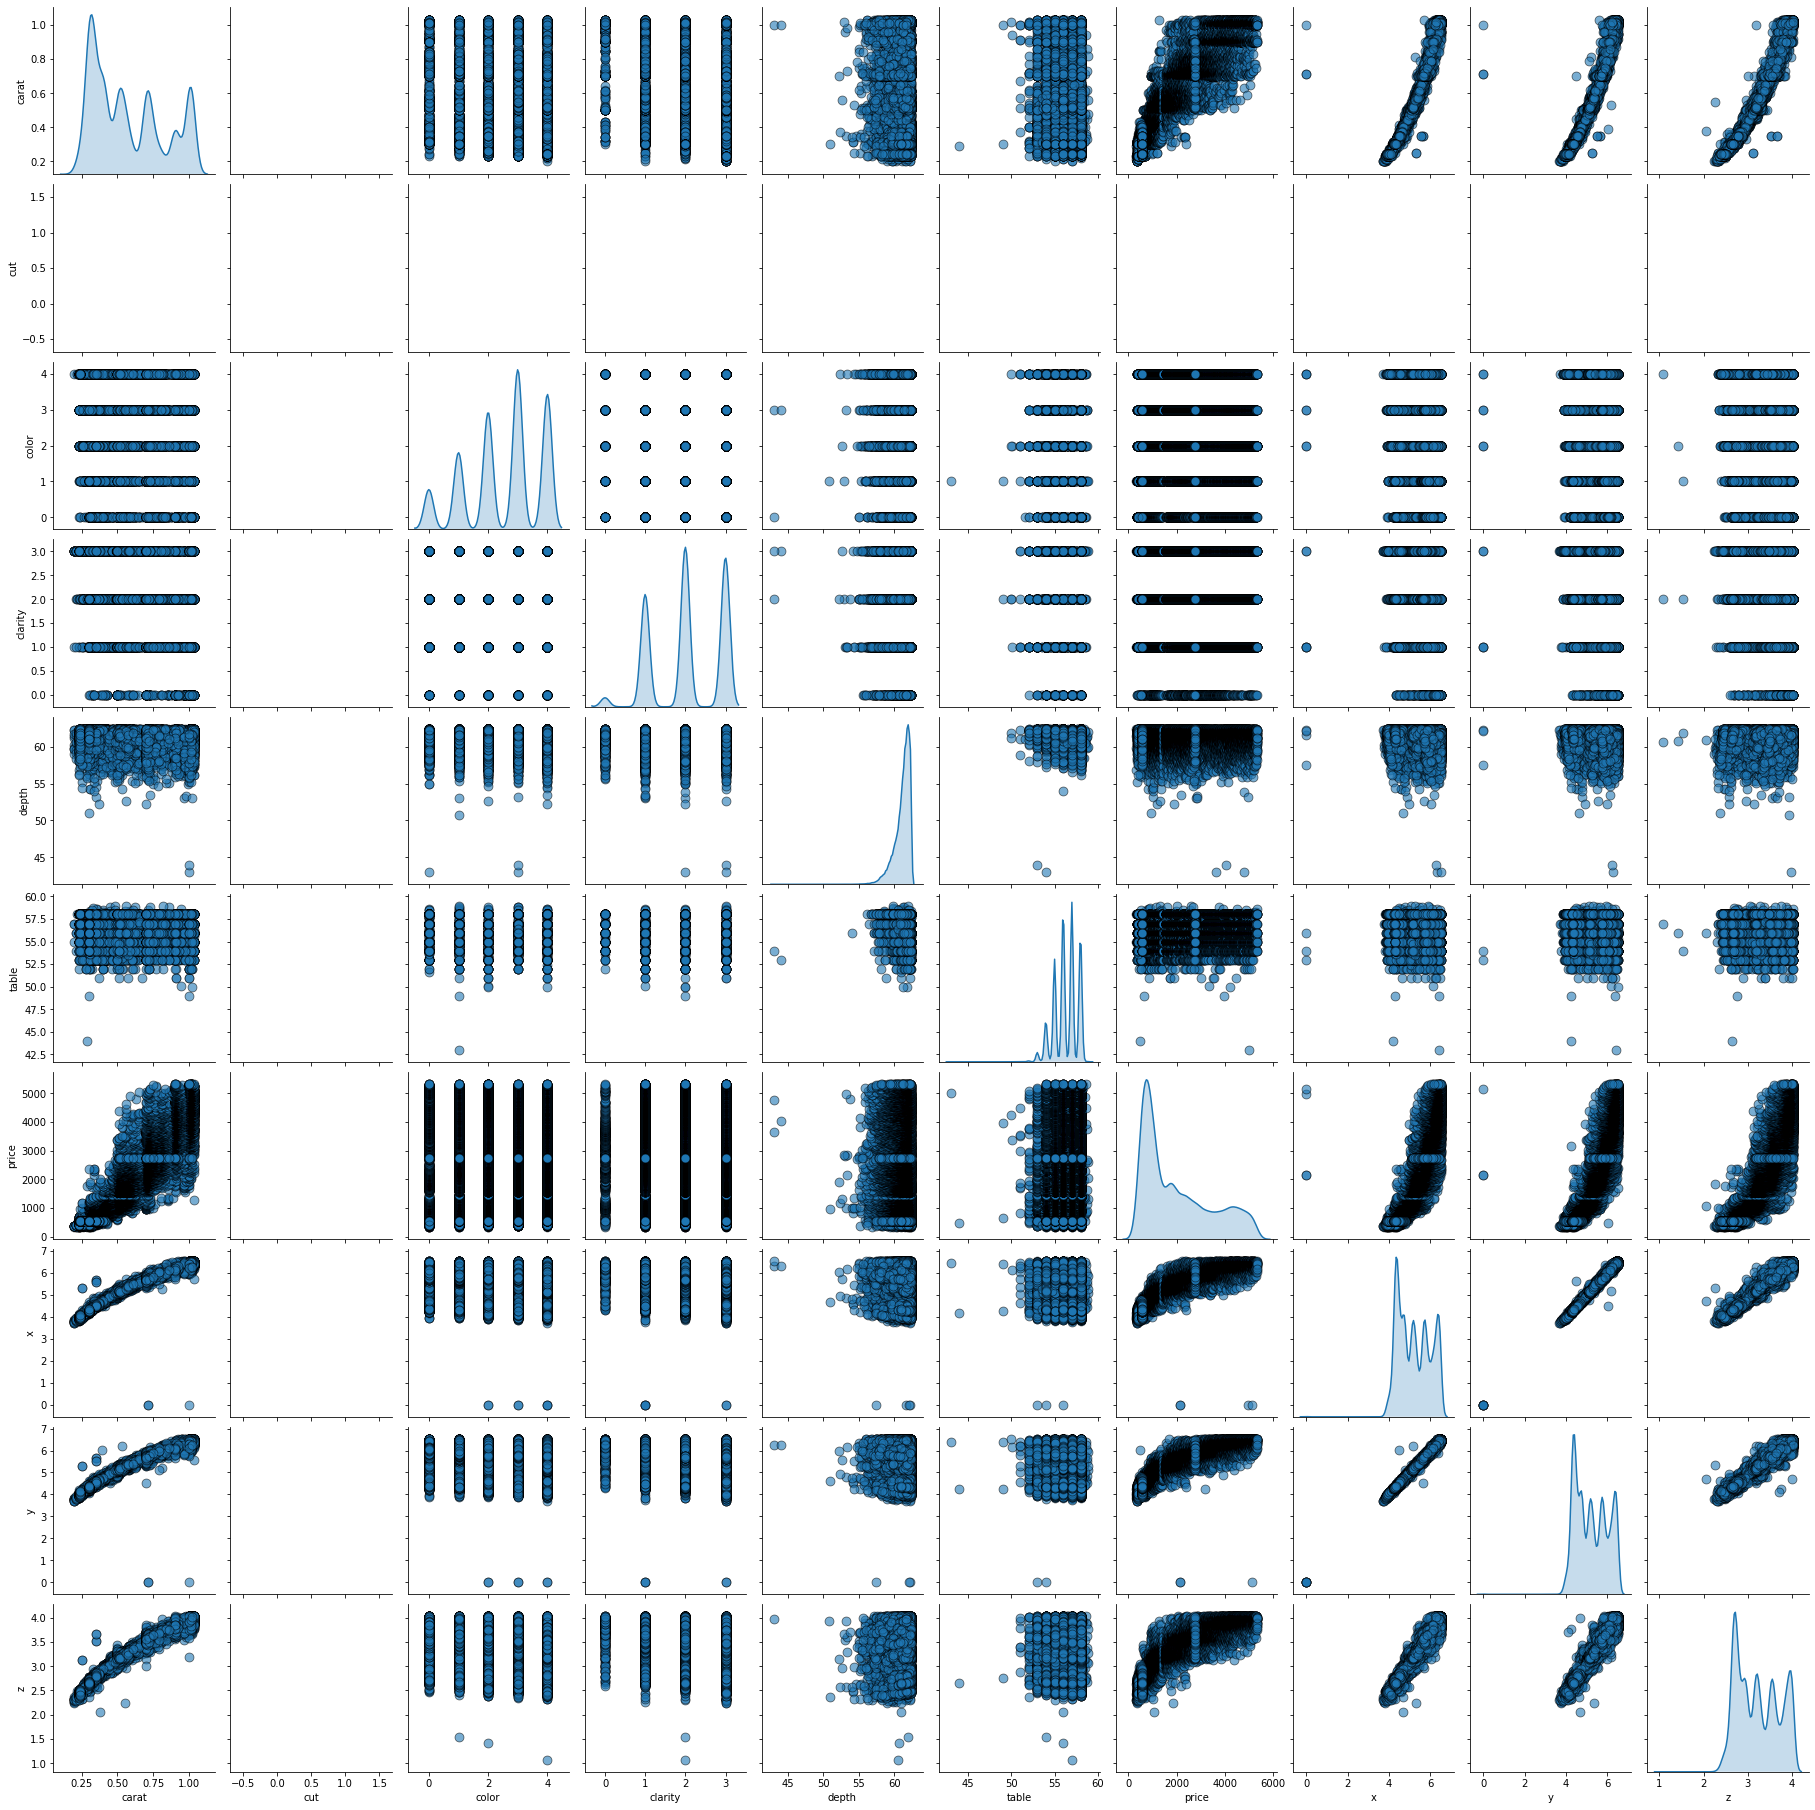

In [37]:
#Run this code
import seaborn as sns
sns.pairplot(diamonds, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

**What do you see here? What relationships between variables are the most interesting?**

In [ ]:
#your thoughts here

Now we will see a correlation matrix with a plot. As you know a higher correlation means that the feature could be an effect (**but is not for sure**) for the changes on the price.

We will see this with a matrix with colors. A lighter color means greater correlation. 

This is done with the `seaborn` library as well.

In [41]:
diamonds.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,NaN,-0.035595,-0.273613,-0.127720,0.136068,0.939824,0.985769,0.984740,0.987739
cut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,-0.035595,NaN,1.000000,0.015235,-0.015046,-0.021953,-0.094167,-0.038160,-0.037067,-0.043829
clarity,-0.273613,NaN,0.015235,1.000000,0.084422,-0.045227,-0.287404,-0.267672,-0.267472,-0.270830
depth,-0.127720,NaN,-0.015046,0.084422,1.000000,-0.269046,-0.088466,-0.097781,-0.099741,-0.086157
table,0.136068,NaN,-0.021953,-0.045227,-0.269046,1.000000,0.133855,0.127910,0.127545,0.132222
price,0.939824,NaN,-0.094167,-0.287404,-0.088466,0.133855,1.000000,0.919152,0.921366,0.920344
x,0.985769,NaN,-0.038160,-0.267672,-0.097781,0.127910,0.919152,1.000000,0.997925,0.987964
y,0.984740,NaN,-0.037067,-0.267472,-0.099741,0.127545,0.921366,0.997925,1.000000,0.987190
z,0.987739,NaN,-0.043829,-0.270830,-0.086157,0.132222,0.920344,0.987964,0.987190,1.000000


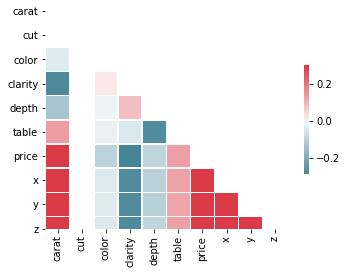

In [43]:
corr= diamonds.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

**What do you see here? Regarding the results before, does it fit with them?**

In [ ]:
# Price has a positive high correlation with x,y and carat


Finally, we will calculate the linear regression between the price and the weight. This will be done first by plotting it with the `seaborn` library and then calculating the error with the `scipy` library.

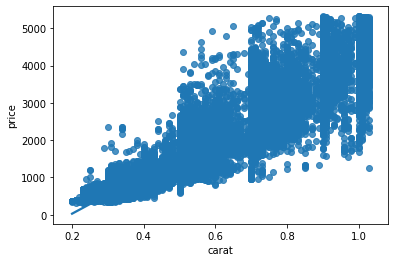

In [45]:
sns.regplot(x="carat", y="price", data=diamonds)

**What do you think?**

In [ ]:
# Positive correlation?

**Would you do any other checks on other features? Do you have any comments regarding `carat`?**

In [ ]:
#your thoughts here

**Conclusion**

**From our dataset** we can conclude that although `color` and `clarity` have a classification, and thus an assigned importance or weight, they do not influence the monetary value of a diamond in determining way. While it is true that different colors or clarities may have different prices, upon closer examination those variations in price seem to be linked to `carat` (weight) and its `dimensions`. In our analysis, the key factor to determining a diamond's value was placed solely in the aforementioned features, since we can see in our correlation coefficients and in the coefficient of determination that these features are closely related.